## Week 10 Homework

1. Download the UCI Heart Disease dataset on Kaggle:  
    https://www.kaggle.com/ronitf/heart-disease-uci

In [12]:
!kaggle datasets download ronitf/heart-disease-uci


  0%|          | 0.00/3.40k [00:00<?, ?B/s]
100%|##########| 3.40k/3.40k [00:00<00:00, 1.74MB/s]


In [13]:
import warnings
warnings.filterwarnings('ignore')
# Hiding Warnings

In [15]:
# imports

import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


import xgboost as xgb
from xgboost.sklearn import XGBClassifier

from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer

from sklearn.metrics import accuracy_score

In [16]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=555, stratify=y)

In [18]:
df['target'].unique()

array([1, 0], dtype=int64)

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


2. Calculate the accuracy of each of the following at estimating the presence of heart disease
    * Logistic Regression
    * Random Forest
    * Support Vector Machine
    * KNeighbors
    * Decision Tree
    * Ada Boost
    * Bagging
    * Gradient Boosting
    * XGBoost

In [21]:
LR = LogisticRegression(solver='lbfgs', random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)
clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555)
clfs = []
print('5-fold cross validation:\n')
for clf, label in zip([LR, RF, SVM, KNC, DTC, ABC, BC, GBC, clf_XGB],
                      ['Logistic Regression',
                       'Random Forest',
                       'Support Vector Machine',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                       'XGBoost']):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = clf.fit(X_train, y_train)
    clfs.append(md)
    print("Test Accuracy: %0.4f " % (sklearn.metrics.accuracy_score(clf.predict(X_test), y_test)))


5-fold cross validation:

Train CV Accuracy: 0.832 (+/- 0.037) [Logistic Regression]
Test Accuracy: 0.7895 
Train CV Accuracy: 0.846 (+/- 0.055) [Random Forest]
Test Accuracy: 0.8026 
Train CV Accuracy: 0.643 (+/- 0.045) [Support Vector Machine]
Test Accuracy: 0.6579 
Train CV Accuracy: 0.687 (+/- 0.049) [KNeighbors]
Test Accuracy: 0.6053 
Train CV Accuracy: 0.763 (+/- 0.045) [Decision Tree]
Test Accuracy: 0.6579 
Train CV Accuracy: 0.762 (+/- 0.043) [Ada Boost]
Test Accuracy: 0.7763 
Train CV Accuracy: 0.810 (+/- 0.046) [Bagging]
Test Accuracy: 0.7895 
Train CV Accuracy: 0.824 (+/- 0.028) [Gradient Boosting]
Test Accuracy: 0.8026 
Train CV Accuracy: 0.828 (+/- 0.030) [XGBoost]
Test Accuracy: 0.7895 


3. Which model performed best in #2 ?

In [ ]:
# The Random Forest and Gradient Boosting models performed best in #2 with testing accuracy of 80.26%.

4. Find a preprocessing technique we have used in class to improve your best model from above.

In [35]:
df.isnull().sum()
# To increase accuracy I will be using MINMAX Scaler for preprocessing studied in past lecture.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

# To increase accuracy I will be using MINMAX Scaler for preprocessing studied in past lecture.

5. Use the ML-Ensemble library to combine your best model and your second best model into a single layer.  
    http://ml-ensemble.com/

In [48]:
ensemble = SuperLearner(scorer=accuracy_score, random_state=555, verbose=2)
ensemble.add([RF, GBC])
# using Random Forest and Gradient Boosting Algorithms because of there higher accuracy

ensemble.add_meta(LogisticRegression())

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...1ACE7B8>)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x000001E451ACE7B8>,
       shuffle=False, verbose=2)

In [49]:
ensemble.fit(X_train, y_train)


Fitting 2 layers
Processing layer-1             done | 00:00:01
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:02


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...1ACE7B8>)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function accuracy_score at 0x000001E451ACE7B8>,
       shuffle=False, verbose=2)

In [50]:
print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(ensemble.predict(X_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(ensemble.predict(X_test), y_test))


Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:01
Accuracy - Train :  1.0

Predicting 2 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:01
Accuracy - Test :  0.8026315789473685


In [ ]:
#  We got an accuracy of 80.26% which is not bad for our ensemble

6. Create a custom model using any technique you prefer.  The (two) students who find the best two models in the class will receive +2% on their final exam score.  Any python ML model using techniques we have studied in class are acceptable.

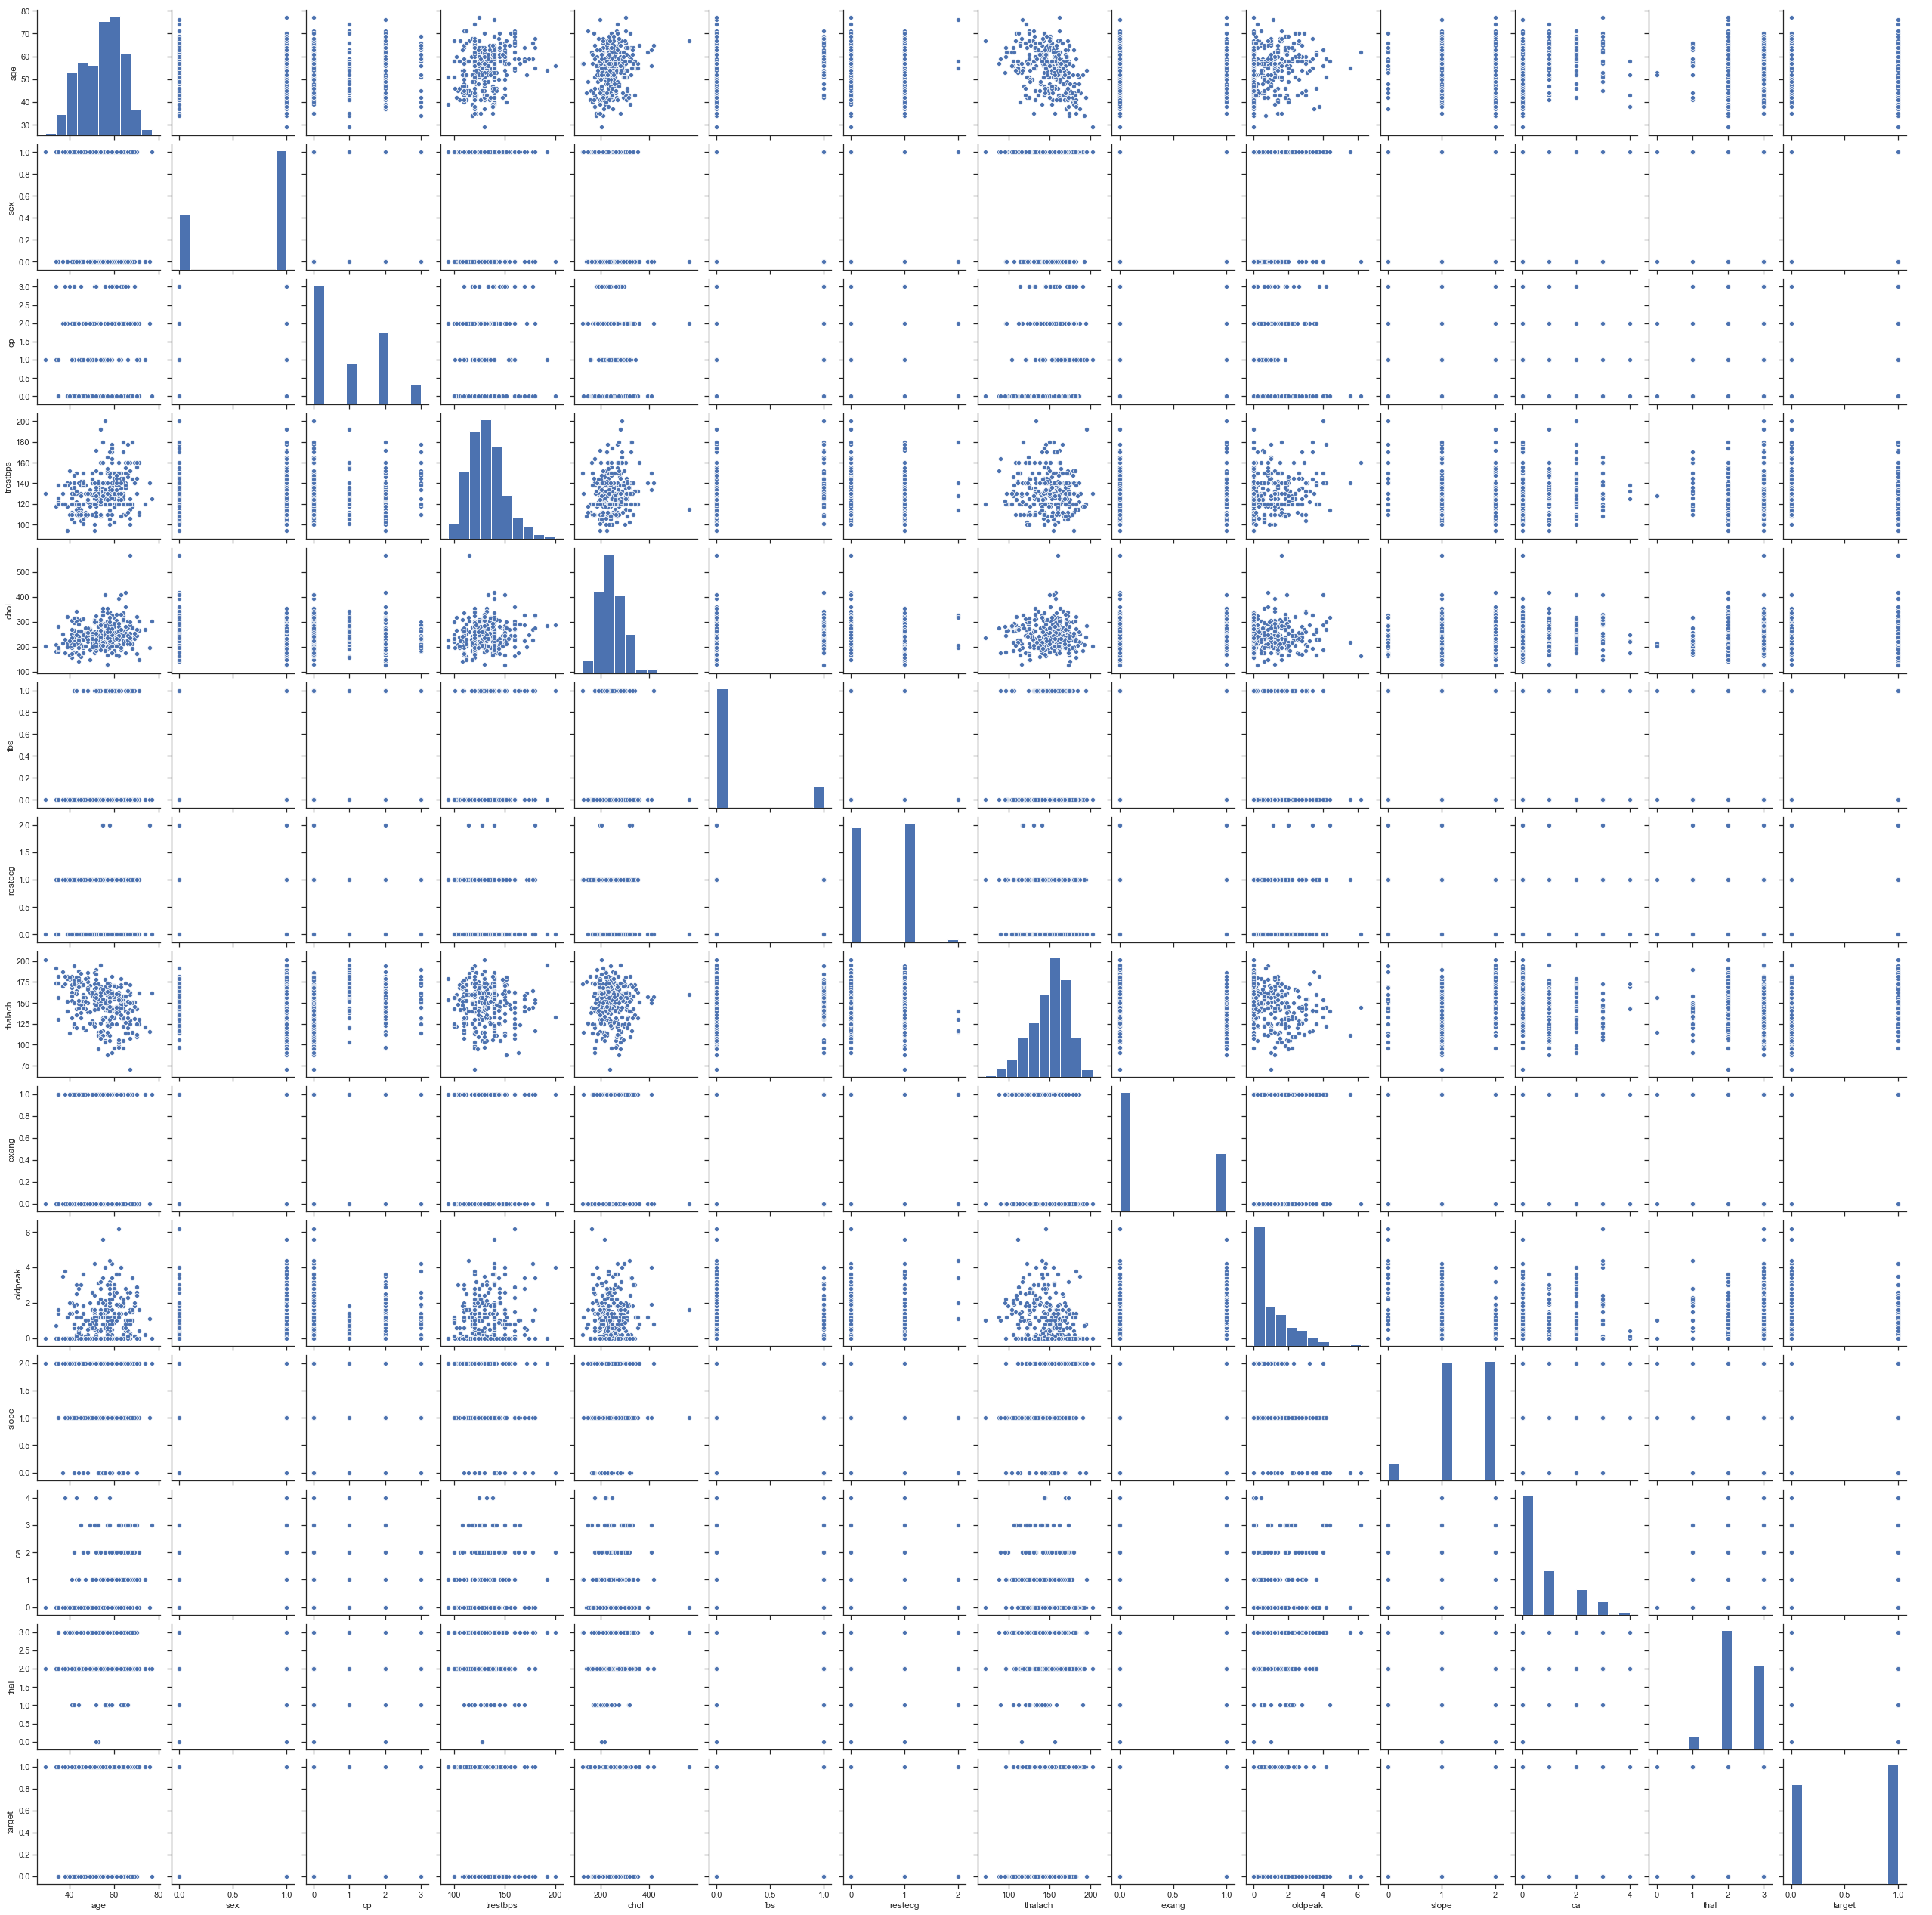

In [46]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)
sns.pairplot(df)

# Analyzing the dataset

In [60]:
# In the above example The Random Forest and Gradient Boosting models performed best in #2 with testing accuracy of 80.26%.
# So I am tring these two models

# Some Preprocessing to inscrease accuracy

dummy1 = pd.get_dummies(df.cp)
dummy2 = pd.get_dummies(df.thal)
dummy3 = pd.get_dummies(df.restecg)
dummy4 = pd.get_dummies(df.slope)
dummy5 = pd.get_dummies(df.ca)
merge = pd.concat([df,dummy1,dummy2,dummy3,dummy4,dummy5],axis = 'columns')

# converting categorical variable into pandas dummy variable for increases accuarcy

In [63]:
final = merge.drop(['cp','thal','restecg','slope','ca'],axis = 1)
final.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,0,...,1,2,0,1,2,0,1,2,3,4
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,172,0,1.4,1,0,...,0,0,0,0,1,1,0,0,0,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,0,0,0,1,1,0,0,0,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,0,0,0,1,1,0,0,0,0


In [64]:
x = final.drop(['target'], axis = 1)
y = final['target']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 5)

In [66]:
# Applying min max scaler for scaling and improving accuracy of dataset

feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)

In [74]:
# Trying Random Forest Classifier

RF = RandomForestClassifier()

parameters = {'n_estimators': [250,500,750,1000],'criterion': ['gini','entropy'],'max_features':['auto','sqrt','log2']}

RFClassifier = GridSearchCV(RF, parameters, scoring='neg_mean_squared_error' ,cv =5)
RFClassifier.fit(x_train, y_train)
RFClassifier.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 250}

In [76]:
RFClass = RandomForestClassifier(criterion = 'entropy',max_features = 'log2',n_estimators = 250, random_state = 5)
RFClass.fit(x_train,y_train)
RFAccuracy = RFClass.score(x_test,y_test)

print('Random Forest Classifier Accuracy is:',((RFAccuracy)*100).round(3))

Random Forest Classifier Accuracy is: 93.421


In [ ]:
# Random Classifier Gained a Wooping Accuracy of 93.42%

In [72]:
# Trying GB classifier


GB = GradientBoostingClassifier()

parameters = {'n_estimators': [250,500,750,1000],'loss': ['deviance','exponential'],'max_features':['auto','sqrt','log2']}

GBClassifier = GridSearchCV(GB, parameters, scoring='neg_mean_squared_error' ,cv =5)
GBClassifier.fit(x_train, y_train)
GBClassifier.best_params_

{'loss': 'deviance', 'max_features': 'sqrt', 'n_estimators': 250}

In [77]:
GBClassifier = GradientBoostingClassifier(loss = 'deviance',max_features = 'log2',n_estimators = 500, random_state = 5)
GBClassifier.fit(x_train,y_train)
GBAccuracy = GBClassifier.score(x_test,y_test)

print('Gradient Boosting Classifier Accuracy is:',((GBAccuracy)*100).round(3))

Gradient Boosting Classifier Accuracy is: 88.158


In [ ]:
# Gradient Boosting Classifier Gained a Accuracy of 88.15%.

In [ ]:
# But the Random Forest Classifier Gained 93.42% of accuracy so accoring to me this is the highest accuracy we can achieve
# on this dataset.